In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
#Parameters
trading_window = 15

#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [34]:
dataimport=pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/data/Indexes/SP GLOBAL 100.csv')
datacopy1 = dataimport.copy()
dataimport['Date'] = pd.to_datetime(dataimport['Date'])
curr = dataimport.columns[0]
dataimport.rename(columns={curr: 'Stocks'}, inplace=True)
dataimport.set_index('Stocks', inplace=True)

#data = dataimport.resample('M').first()  #Monthly Resampling



dataimport.head()

,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,7267 JT Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-03,4486.5,85.50,3319.990,94.15,43.58,91.94,32.610,109.6951,51.63,1071.7,...,27.46,114.85,465.55,9.713,43.408,21.5225,644.0,570.898,49.7697,143.0
2011-01-04,4502.0,85.04,3391.157,93.71,44.16,91.60,31.935,111.6754,51.47,1076.7,...,27.73,114.15,492.90,9.670,43.643,20.9925,653.0,579.017,49.4283,143.2
2011-01-05,4476.5,84.66,3332.929,94.52,44.70,91.44,31.745,111.8554,50.76,1068.3,...,27.70,113.00,499.25,9.618,44.995,21.1300,659.0,582.863,49.3429,142.5
2011-01-06,4437.0,84.57,3294.111,93.54,44.48,90.69,31.515,111.3754,50.62,1081.7,...,27.28,114.00,496.90,9.777,45.834,20.9400,676.0,588.845,50.2819,142.9
2011-01-07,4426.5,83.70,3265.743,93.73,43.64,91.19,31.460,110.5953,50.50,1085.0,...,27.07,113.35,492.50,9.857,45.775,20.8825,691.0,582.008,49.6986,142.0


In [35]:

monthly = dataimport.pct_change()
monthly=monthly.dropna()
monthly.head()

,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,7267 JT Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
Stocks,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.003455,-0.005380,0.021436,-0.004673,0.013309,-0.003698,-0.020699,0.018053,-0.003099,0.004665,...,0.009832,-0.006095,0.058748,-0.004427,0.005414,-0.024625,0.013975,0.014221,-0.006860,0.001399
2011-01-05,-0.005664,-0.004468,-0.017171,0.008644,0.012228,-0.001747,-0.005950,0.001612,-0.013794,-0.007802,...,-0.001082,-0.010074,0.012883,-0.005377,0.030979,0.006550,0.009188,0.006642,-0.001728,-0.004888
2011-01-06,-0.008824,-0.001063,-0.011647,-0.010368,-0.004922,-0.008202,-0.007245,-0.004291,-0.002758,0.012543,...,-0.015162,0.008850,-0.004707,0.016532,0.018647,-0.008992,0.025797,0.010263,0.019030,0.002807
2011-01-07,-0.002366,-0.010287,-0.008612,0.002031,-0.018885,0.005513,-0.001745,-0.007004,-0.002371,0.003051,...,-0.007698,-0.005702,-0.008855,0.008182,-0.001287,-0.002746,0.022189,-0.011611,-0.011601,-0.006298
2011-01-10,-0.008472,-0.013142,-0.016611,-0.003627,-0.005500,-0.008554,0.002225,0.004340,-0.001782,0.000000,...,-0.009235,-0.018968,-0.012487,-0.018261,-0.011360,0.007662,0.000000,-0.013216,0.016318,-0.002113


In [36]:
data = dataimport.transpose()
#data.head()

In [37]:
train_data = monthly.iloc[:260]  

for i in train_data.columns:
    train_data[i] = (1 + train_data[i]).cumprod() - 1

train_data=train_data.transpose()
train_data

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_5210/3013434293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[i] = (1 + train_data[i]).cumprod() - 1


Stocks,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-17,...,2011-12-20,2011-12-21,2011-12-22,2011-12-23,2011-12-26,2011-12-27,2011-12-28,2011-12-29,2011-12-30,2012-01-02
RIO LN Equity,0.003455,-0.002229,-0.011033,-0.013373,-0.021732,-0.009027,1.248189e-02,0.003789,-0.011256,-0.022735,...,-0.309930,-0.312382,-0.300123,-0.296222,-0.296222,-0.296222,-0.311044,-0.305583,-0.303466,-0.303466
OR FP Equity,-0.005380,-0.009825,-0.010877,-0.021053,-0.033918,-0.014737,-1.824561e-02,-0.026082,-0.032164,-0.026316,...,-0.082105,-0.080819,-0.082105,-0.068070,-0.068070,-0.067602,-0.068772,-0.060819,-0.056140,-0.043275
AAL LN Equity,0.021436,0.003897,-0.007795,-0.016340,-0.032679,-0.015590,1.828801e-02,0.022335,-0.010643,-0.013791,...,-0.301904,-0.310448,-0.297856,-0.292910,-0.292910,-0.292910,-0.299056,-0.290361,-0.286764,-0.286764
CAT UN Equity,-0.004673,0.003930,-0.006479,-0.004461,-0.008072,-0.002124,-7.010090e-03,-0.000106,-0.001487,-0.001487,...,-0.025704,-0.026766,-0.024854,-0.020181,-0.020181,-0.027616,-0.050770,-0.037918,-0.037706,-0.037706
JPM UN Equity,0.013309,0.025700,0.020652,0.001377,-0.004130,0.000459,2.592933e-02,0.019963,0.030519,0.030519,...,-0.260899,-0.258375,-0.232446,-0.229693,-0.229693,-0.242084,-0.250803,-0.233134,-0.237035,-0.237035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKE UN Equity,-0.024625,-0.018237,-0.027065,-0.029736,-0.022302,-0.024045,-2.741317e-02,-0.041004,-0.023464,-0.023464,...,0.087583,0.119178,0.101406,0.125566,0.125566,0.135672,0.120107,0.132071,0.119410,0.119410
7203 JT Equity,0.013975,0.023292,0.049689,0.072981,0.072981,0.072981,8.695652e-02,0.097826,0.102484,0.086957,...,-0.231056,-0.220186,-0.224845,-0.224845,-0.219876,-0.221739,-0.215217,-0.214286,-0.203416,-0.203416
PRU LN Equity,0.014221,0.020958,0.031436,0.019461,0.005987,0.031436,4.416200e-02,0.038921,0.043412,0.032934,...,-0.071109,-0.082335,-0.076348,-0.065120,-0.065120,-0.065120,-0.066618,-0.056138,-0.044162,-0.044162
DD UN Equity,-0.006860,-0.008575,0.010291,-0.001429,0.014866,0.014581,2.487256e-02,0.019154,0.027159,0.027159,...,-0.229274,-0.220126,-0.197827,-0.175528,-0.175528,-0.175528,-0.194683,-0.178673,-0.177815,-0.177815


In [38]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
ap.fit(train_data)
labels = ap.predict(train_data)

In [39]:
groups = []
for i in range(labels.max()+1):
    arr = []
    for j in range(len(labels)):
        if labels[j] == i:
            arr.append(train_data.index[j])
    groups.append(arr)


for i in range(len(groups)):
    print("Group", i+1, ":", groups[i])

Group 1 : ['CAT UN Equity', 'MMM UN Equity', 'RTX UN Equity', 'TMO UN Equity', '700 HK Equity', 'AZN LN Equity', 'AON UN Equity', 'DTE GY Equity', 'PRU LN Equity']
Group 2 : ['NVDA UW Equity']
Group 3 : ['HPQ UN Equity', '6752 JT Equity', 'PHIA NA Equity', '6758 JT Equity', 'C UN Equity', 'GS UN Equity', 'F UN Equity', 'RWE GY Equity', 'MS UN Equity']
Group 4 : ['OR FP Equity', 'ASML NA Equity', 'MRK UN Equity', 'TTE FP Equity', 'PG UN Equity', '005930 KP Equity', '7751 JT Equity', 'MSFT UW Equity', 'MC FP Equity', 'GOOGL UW Equity', 'NESN SE Equity', 'NOVN SE Equity', 'SREN SE Equity', 'BP/ LN Equity']
Group 5 : ['SAN SQ Equity', 'UBSG SE Equity', 'BARC LN Equity', 'DBK GY Equity']
Group 6 : ['GE UN Equity', 'BBVA SQ Equity', 'CS FP Equity', 'SGO FP Equity', 'INGA NA Equity', 'ALV GY Equity', '7203 JT Equity']
Group 7 : ['CVX UN Equity', 'KO UN Equity', 'AMT UN Equity', 'AMZN UW Equity', 'IBM UN Equity', 'JNJ UN Equity', 'MCD UN Equity', 'PFE UN Equity', 'WMT UN Equity', '5108 JT Equi

# Indicators

In [40]:

datacopy1['Date'] = pd.to_datetime(datacopy1['Date'])
datacopy1.set_index('Date', inplace=True)
data = datacopy1

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-03,4486.5,85.50,3319.990,94.15,43.58,91.94,32.610,109.6951,51.63,...,27.46,114.85,465.55,9.713,43.408,21.5225,644.0,570.898,49.7697,143.0
1,2011-01-04,4502.0,85.04,3391.157,93.71,44.16,91.60,31.935,111.6754,51.47,...,27.73,114.15,492.90,9.670,43.643,20.9925,653.0,579.017,49.4283,143.2
2,2011-01-05,4476.5,84.66,3332.929,94.52,44.70,91.44,31.745,111.8554,50.76,...,27.70,113.00,499.25,9.618,44.995,21.1300,659.0,582.863,49.3429,142.5
3,2011-01-06,4437.0,84.57,3294.111,93.54,44.48,90.69,31.515,111.3754,50.62,...,27.28,114.00,496.90,9.777,45.834,20.9400,676.0,588.845,50.2819,142.9
4,2011-01-07,4426.5,83.70,3265.743,93.73,43.64,91.19,31.460,110.5953,50.50,...,27.07,113.35,492.50,9.857,45.775,20.8825,691.0,582.008,49.6986,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,2022-12-26,5808.0,333.25,3249.500,239.87,131.28,177.40,63.820,63.8241,212.45,...,165.59,303.50,478.90,18.868,61.350,116.2500,1823.0,1116.500,68.7300,366.8
3126,2022-12-27,5808.0,336.75,3249.500,243.14,131.74,179.63,64.210,64.6434,210.90,...,166.44,305.30,478.90,18.940,61.880,117.5600,1817.5,1116.500,68.7800,363.2
3127,2022-12-28,5818.0,335.40,3286.000,239.38,132.46,176.98,63.570,63.9646,210.10,...,164.60,303.80,480.40,18.928,61.330,114.9800,1819.0,1123.500,67.8000,362.4
3128,2022-12-29,5834.0,338.70,3254.500,240.20,133.22,178.32,63.950,65.3536,215.74,...,166.78,305.90,480.75,19.084,62.000,117.3500,1817.0,1134.000,68.5800,363.4


In [41]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [42]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3112,2022-12-27,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3113,2022-12-28,0,0,0,0,0,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
3114,2022-12-29,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [44]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,30.165500,52.455610,31.685352,40.021152,62.632475,66.583255,28.397677,76.756187,46.287256,...,53.969601,61.958420,59.430987,66.482474,54.322422,28.887308,49.937796,39.892874,38.640493,78.450566
1,2011-01-24,42.825961,55.589637,35.867779,52.697477,59.090033,68.739042,39.799504,79.537750,53.982231,...,55.418102,66.155257,59.094295,67.635238,52.543357,33.547598,56.162030,33.815391,47.454965,82.785704
2,2011-01-25,38.671569,57.274642,32.723867,51.537356,57.155942,68.441856,36.132342,77.539405,58.667288,...,62.600262,54.768129,59.094295,62.473415,56.608057,36.295134,61.839243,45.344405,51.781389,83.670155
3,2011-01-26,48.886698,63.328255,41.447933,58.899604,58.235524,72.081505,36.132342,75.496129,64.781221,...,58.426388,51.367459,52.948246,57.880318,61.996367,48.067237,52.348189,55.030063,52.219848,83.670155
4,2011-01-27,50.027559,51.820054,40.568212,62.833996,59.436338,72.746413,32.973273,79.060946,65.362039,...,67.702679,55.530508,47.615140,58.409546,59.228597,39.446218,56.747575,64.093098,55.956135,84.368724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,63.745097,41.304319,55.890981,61.113511,49.229222,53.690053,59.649645,49.117328,47.942676,...,44.999700,58.053988,53.623862,41.380040,45.303259,63.478099,29.421164,67.026427,52.865998,42.557008
3112,2022-12-27,63.745097,45.001572,55.890981,64.485854,50.711842,56.833749,62.450510,52.456166,45.736172,...,47.232571,60.378880,53.623862,44.109556,48.099082,65.097848,28.815431,67.026427,53.109768,38.992676
3113,2022-12-28,64.211144,43.854122,58.443937,58.232367,53.024170,52.290998,55.626683,49.554849,44.595357,...,43.148891,57.517876,54.669117,43.743968,45.499937,59.500902,29.243292,68.122497,47.882627,38.226473
3114,2022-12-29,64.986679,47.385746,55.460597,59.162464,55.402559,54.280998,58.524506,55.035290,53.417121,...,48.797302,60.350469,54.924405,49.592928,49.107736,62.675521,28.993065,69.746987,51.937260,39.818385


In [45]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,RIO LN Equity,OR FP Equity,AAL LN Equity,CAT UN Equity,JPM UN Equity,CVX UN Equity,KO UN Equity,GE UN Equity,AMT UN Equity,...,MMC UN Equity,MUV2 GY Equity,BP/ LN Equity,DTE GY Equity,MBG GY Equity,NKE UN Equity,7203 JT Equity,PRU LN Equity,DD UN Equity,RO SE Equity
0,2011-01-21,4243.0,84.72,3076.627,92.75,45.29,93.78,31.380,118.4564,50.52,...,27.60,115.45,497.30,9.940,45.985,20.5750,674.0,568.334,49.0726,148.0
1,2011-01-24,4347.5,85.17,3111.464,94.57,45.02,94.10,31.625,120.2566,51.01,...,27.66,116.25,497.00,9.966,45.767,20.6650,683.0,559.360,49.7840,149.6
2,2011-01-25,4290.0,85.42,3060.701,94.39,44.87,94.08,31.480,119.8966,51.37,...,28.00,114.85,497.00,9.908,46.346,20.7200,693.0,570.898,50.1966,150.0
3,2011-01-26,4400.0,86.43,3140.827,95.75,44.98,94.64,31.480,119.5365,51.94,...,27.86,114.35,491.70,9.852,47.236,21.0000,680.0,584.145,50.2393,150.0
4,2011-01-27,4414.0,84.96,3128.385,96.63,45.10,94.75,31.350,121.6968,52.00,...,28.42,115.05,486.40,9.861,46.925,20.6925,688.0,601.665,50.6092,150.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,2022-12-26,5808.0,333.25,3249.500,239.87,131.28,177.40,63.820,63.8241,212.45,...,165.59,303.50,478.90,18.868,61.350,116.2500,1823.0,1116.500,68.7300,366.8
3112,2022-12-27,5808.0,336.75,3249.500,243.14,131.74,179.63,64.210,64.6434,210.90,...,166.44,305.30,478.90,18.940,61.880,117.5600,1817.5,1116.500,68.7800,363.2
3113,2022-12-28,5818.0,335.40,3286.000,239.38,132.46,176.98,63.570,63.9646,210.10,...,164.60,303.80,480.40,18.928,61.330,114.9800,1819.0,1123.500,67.8000,362.4
3114,2022-12-29,5834.0,338.70,3254.500,240.20,133.22,178.32,63.950,65.3536,215.74,...,166.78,305.90,480.75,19.084,62.000,117.3500,1817.0,1134.000,68.5800,363.4


#  strat1 RSI+MACD fixed exit strat

In [46]:
def get_returns(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            n = 0
            temp = 0

        i += 1

    return returns,num_trades

In [47]:
returns,num_trades = get_returns(groups,master_macd,master_rsi,prices,trading_window)

In [48]:
tradesheet1 = pd.DataFrame()
tradesheet1['Returns'] = returns
tradesheet1['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet1.insert(0,f'Window (period = {trading_window})',windows)
tradesheet1

,Window (period = 15),Returns,Number of Trades
0,1,-48.259538,11
1,2,-37.676716,13
2,3,111.806336,12
3,4,-20.050525,8
4,5,-121.641414,23
...,...,...,...
202,203,-358.302471,14
203,204,413.801510,17
204,205,-63.717062,6
205,206,1814.830317,20


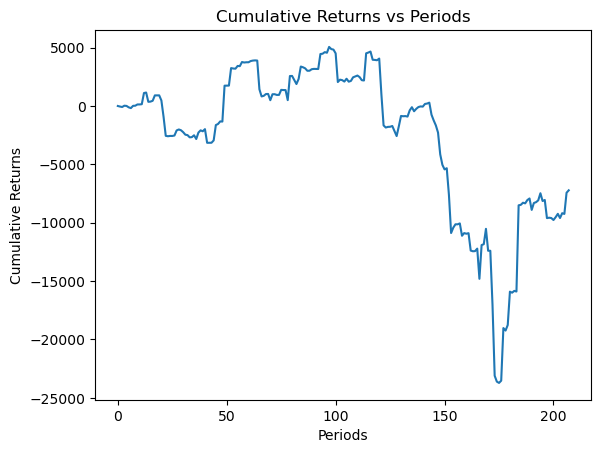

In [49]:
cumulative_returns_1 = []
cumulative_returns_1.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_1.append(s)


plt.plot(windows,cumulative_returns_1)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


# Strat-2 with variable exit in window + fixed exit at the end

In [50]:
def get_returns_2(groups,master_macd,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_macd.iloc[i,j]==1):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_macd.iloc[i,j]==-1):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
            
            elif(buy!=0):
                for trade in intrade:
                    if(trade[3]==buy):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1


            elif(sell!=0):
                for trade in intrade:
                    if(trade[1]==sell):
                        b1 = prices.iloc[trade[0],trade[1]]
                        s1 = prices.iloc[trade[0],trade[3]]
                        b2 = prices.iloc[i,trade[1]]
                        s2 = prices.iloc[i,trade[3]]
                        temp += (((b2-b1))*trade[2]) + ((s1-s2))
                        intrade.remove(trade)
                        n += 1 
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n += 1
            intrade = []
            returns.append(temp)
            num_trades.append(n)
            temp = 0
            n = 0

        i += 1

    return returns,num_trades

In [51]:
returns,num_trades = get_returns_2(groups,master_macd,master_rsi,prices,trading_window)

In [52]:
tradesheet2 = pd.DataFrame()
tradesheet2['Returns'] = returns
tradesheet2['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet2.insert(0,f'Window (period = {trading_window})',windows)
tradesheet2

,Window (period = 15),Returns,Number of Trades
0,1,-48.458537,11
1,2,-37.285127,13
2,3,114.894177,12
3,4,-20.050525,8
4,5,-79.110171,23
...,...,...,...
202,203,-322.532994,14
203,204,406.919154,17
204,205,7.685578,6
205,206,1763.503430,20


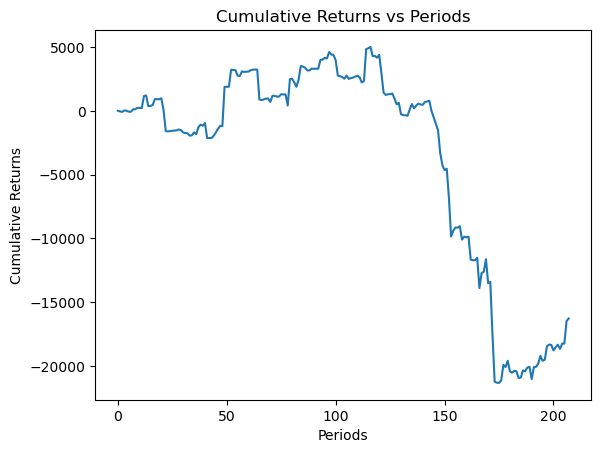

In [53]:

cumulative_returns_2 = []
cumulative_returns_2.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_2.append(s)


plt.plot(windows,cumulative_returns_2)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()


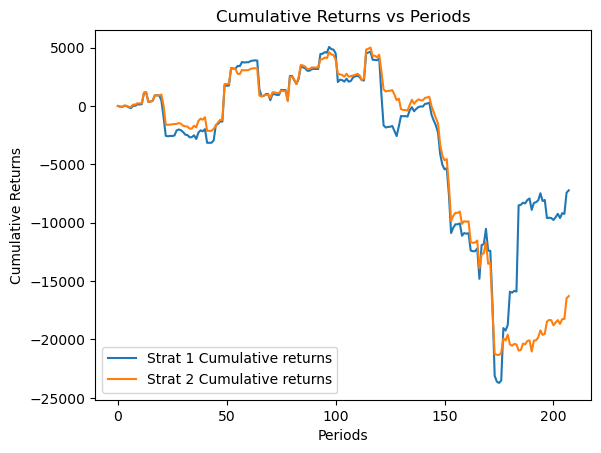

In [ ]:
plt.plot(windows,cumulative_returns_1,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_2,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/with clustering/daily/SP GLOBAL 100_macd_rsi.png')
plt.show()

# strat 3 RSI Fixed exit

In [55]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [56]:
returns,num_trades = get_returns(groups,master_rsi,prices,trading_window)

In [57]:
tradesheet3 = pd.DataFrame()
tradesheet3['Returns'] = returns
tradesheet3['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet3.insert(0,f'Window (period = {trading_window})',windows)
tradesheet3

,Window (period = 15),Returns,Number of Trades
0,1,5.293323,22
1,2,-5.748385,7
2,3,-3.124501,1
3,4,16.959922,3
4,5,-1.436091,1
...,...,...,...
202,203,-40.247684,7
203,204,0.000000,0
204,205,24.031083,9
205,206,18.135513,4


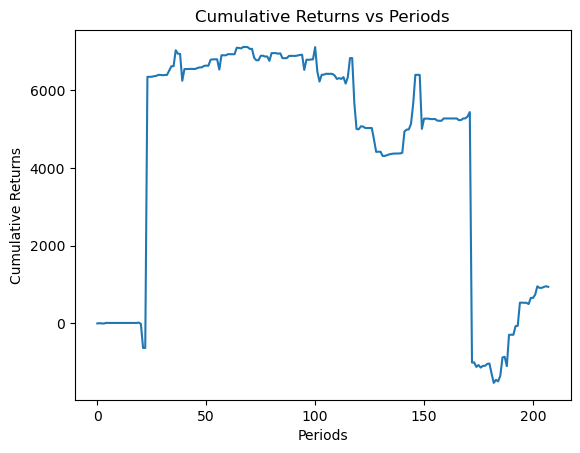

In [58]:
cumulative_returns_3 = []
cumulative_returns_3.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_3.append(s)


plt.plot(windows,cumulative_returns_3)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

# strat 4 RSI variable exit

In [59]:
def get_returns(groups,master_rsi,prices,period) :
    returns = []
    num_trades = []
    temp = 0
    intrade = []
    i = 0
    n = 0
    while i<len(prices):
        for group in groups:
            buy = 0
            buy_rsi = 100.0
            sell = 0
            sell_rsi = 0.0
            for j in range(1,len(prices.columns)):
                if(prices.columns[j] in group):
                    if(master_rsi.iloc[i,j]<30):
                        if(master_rsi.iloc[i,j]<buy_rsi):
                            buy = j
                            buy_rsi = master_rsi.iloc[i,j]
                    elif(master_rsi.iloc[i,j]>70):
                        if(master_rsi.iloc[i,j]>sell_rsi):
                            sell = j
                            sell_rsi = master_rsi.iloc[i,j]
            
            if(buy!=0 and sell!=0):
                buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
                l = [i,buy,buy_quantity,sell]
                intrade.append(l)
        
        if((i+1)%period==0):
            for x in range(len(intrade)):
                b1 = prices.iloc[intrade[x][0],intrade[x][1]]
                s1 = prices.iloc[intrade[x][0],intrade[x][3]]
                b2 = prices.iloc[i,intrade[x][1]]
                s2 = prices.iloc[i,intrade[x][3]]
                temp += (((b2-b1))*intrade[x][2]) + ((s1-s2))
                n+=1
            intrade = []
            returns.append(temp)
            temp = 0
            num_trades.append(n)
            n = 0

        i += 1

    return returns,num_trades

In [60]:
tradesheet4 = pd.DataFrame()
tradesheet4['Returns'] = returns
tradesheet4['Number of Trades'] = num_trades
windows = []
for i in range(len(returns)):
    windows.append(i+1)
tradesheet4.insert(0,f'Window (period = {trading_window})',windows)
tradesheet4

,Window (period = 15),Returns,Number of Trades
0,1,5.293323,22
1,2,-5.748385,7
2,3,-3.124501,1
3,4,16.959922,3
4,5,-1.436091,1
...,...,...,...
202,203,-40.247684,7
203,204,0.000000,0
204,205,24.031083,9
205,206,18.135513,4


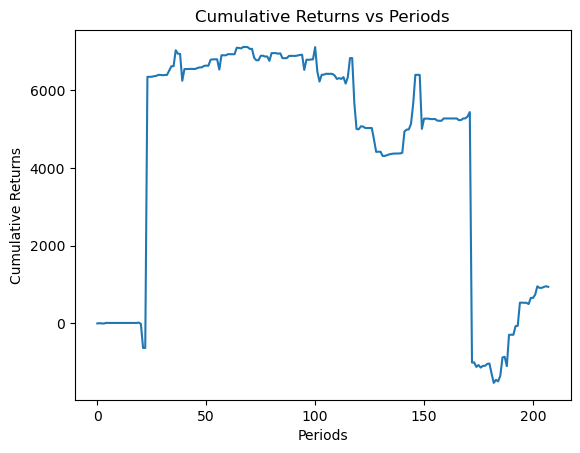

In [61]:
cumulative_returns_4 = []
cumulative_returns_4.insert(0,0)
windows.insert(0,0)
s = 0
for i in returns :
    s = s + i
    cumulative_returns_4.append(s)


plt.plot(windows,cumulative_returns_4)
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.show()

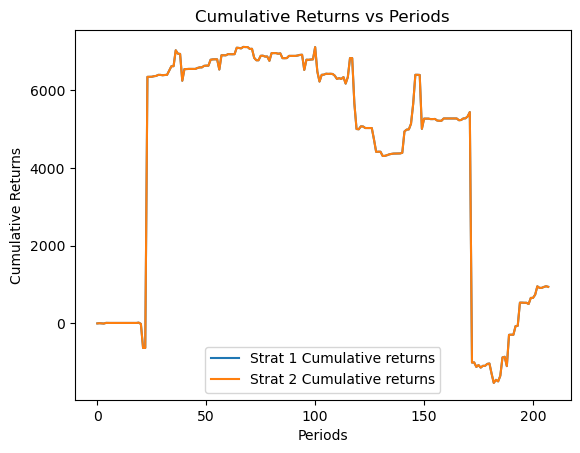

In [ ]:
plt.plot(windows,cumulative_returns_3,label = "Strat 1 Cumulative returns")
plt.plot(windows,cumulative_returns_4,label = "Strat 2 Cumulative returns")
plt.xlabel('Periods')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns vs Periods')
plt.legend()
plt.savefig('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/plots/with clustering/daily/SP GLOBAL 100_rsi.png')
plt.show()
